In [1]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw, ImageFont

In [2]:
import os

In [3]:
os.listdir()

['generated',
 'hand_detecction.py',
 'image_processing.ipynb',
 'img-01.png',
 'img-02.png',
 'img-03.png',
 'img-04.png',
 'img-05.jpg',
 'the_kid_rotated.png',
 'webcam_drawing.py']

In [5]:
im1 = Image.open('img-01.png')
im2 = Image.open('img-02.png')
im3 = Image.open('img-03.png')
im4 = Image.open('img-04.png')
im5 = Image.open('img-05.png')

In [6]:
print(f'Format: {im4.format}')
print(f'Mode: {im4.mode}')
print(f'Size: {im4.size}')
print(f'info: {im4.info}')

Format: JPEG
Mode: RGB
Size: (1000, 1498)
info: {'jfif': 257, 'jfif_version': (1, 1), 'dpi': (72, 72), 'jfif_unit': 1, 'jfif_density': (72, 72), 'progressive': 1, 'progression': 1, 'icc_profile': b'\x00\x00\x03\xacKCMS\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x0c\x00\x01\x00\x12\x00:\x00\x15acspMSFT\x00\x00\x00\x00KODAROMM\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3+KODA\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0ccprt\x00\x00\x01\x14\x00\x00\x00Hdesc\x00\x00\x01\\\x00\x00\x00\x83wtpt\x00\x00\x01\xe0\x00\x00\x00\x14rTRC\x00\x00\x01\xf4\x00\x00\x00\x0egTRC\x00\x00\x01\xf4\x00\x00\x00\x0ebTRC\x00\x00\x01\xf4\x00\x00\x00\x0erXYZ\x00\x00\x02\x04\x00\x00\x00\x14gXYZ\x00\x00\x02\x18\x00\x00\x00\x14bXYZ\x00\x00\x02,\x00\x00\x00\x14dmnd\x00\x00\x02@\x00\x00\x00ndmdd\x00\x00\x02\xb0\x00\x00\x00\xd1mmod\x

# resize

In [10]:
h = im1.height
w = im1.width
# scale to 3x
im1_bigger = im1.resize((w*3,h*3))
im1_bigger.show()
 

In [8]:
batman_logo = im5.resize((im5.width//3, im5.height//3))  # reduce size by 1/3
batman_logo.show()


# rotate and transpose

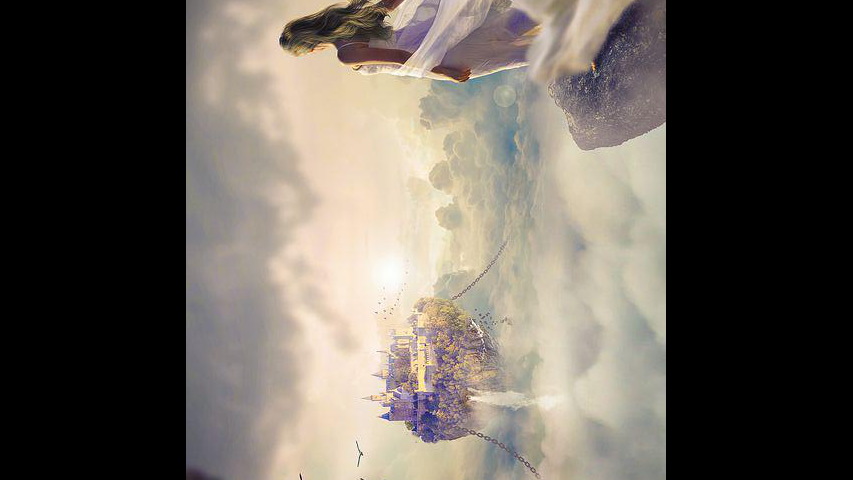

In [11]:
im2.rotate(90)

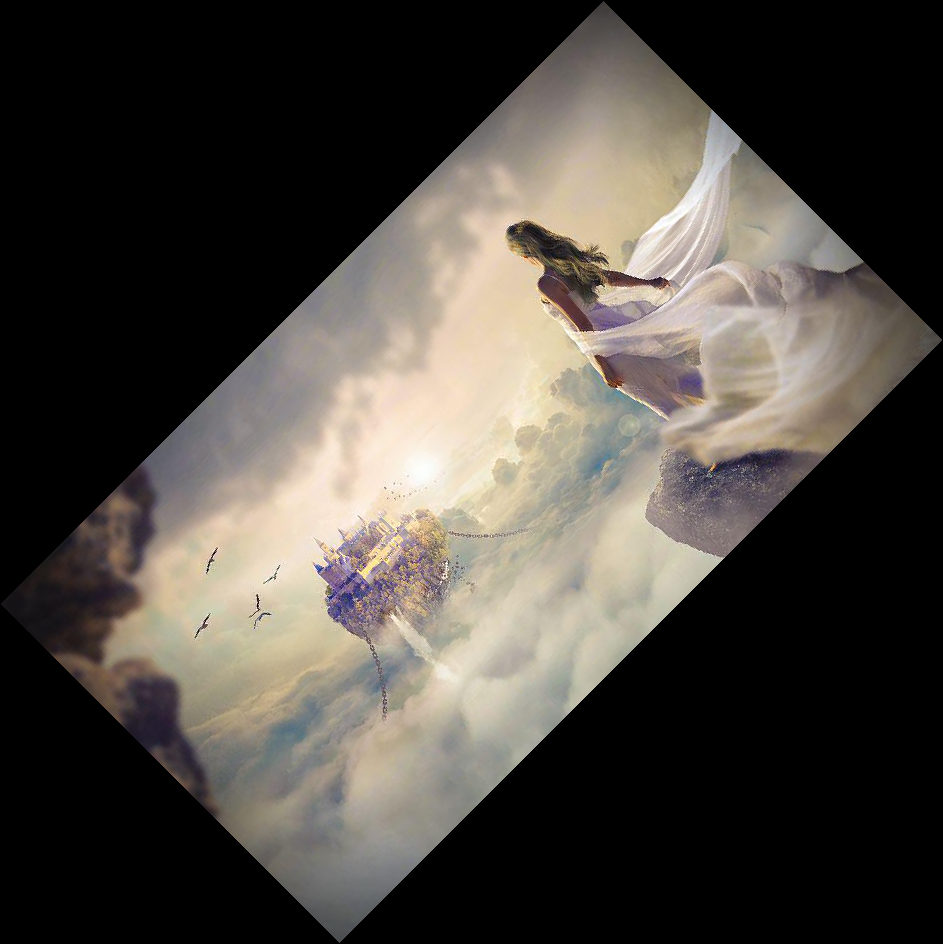

In [12]:
im2.rotate(45, expand=True)


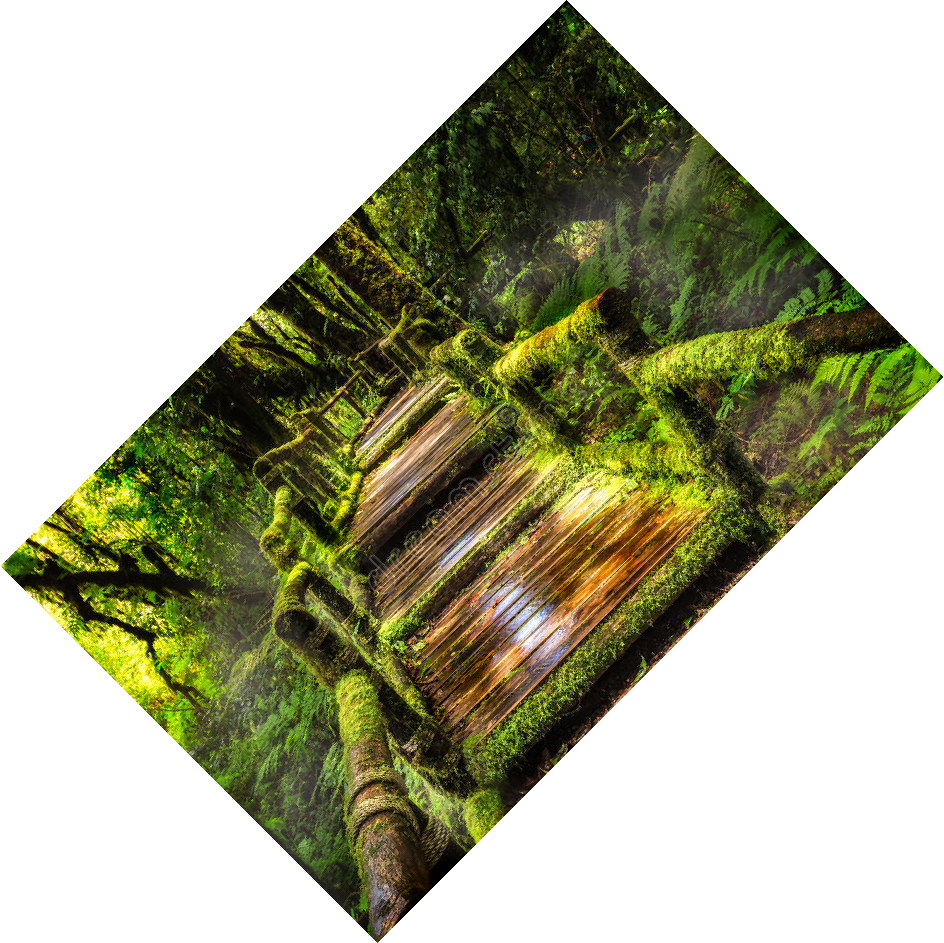

In [13]:
im1.rotate(45, expand=True, fillcolor='white')


In [14]:
im2.rotate(45, expand=True, fillcolor='yellow').save('the_kid_rotated.png')

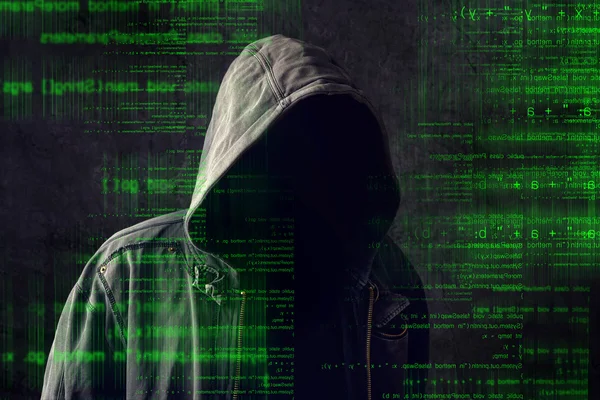

In [15]:
im3.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

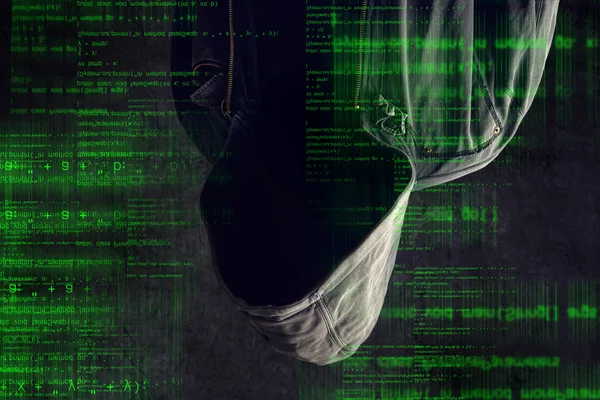

In [16]:
im3.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

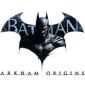

In [17]:
w,h = batman_logo.width, batman_logo.height
batman_logo = batman_logo.resize((w//2, h//2))  # 50% of original size
batman_logo

In [20]:
batman_logo.mode

'RGBA'

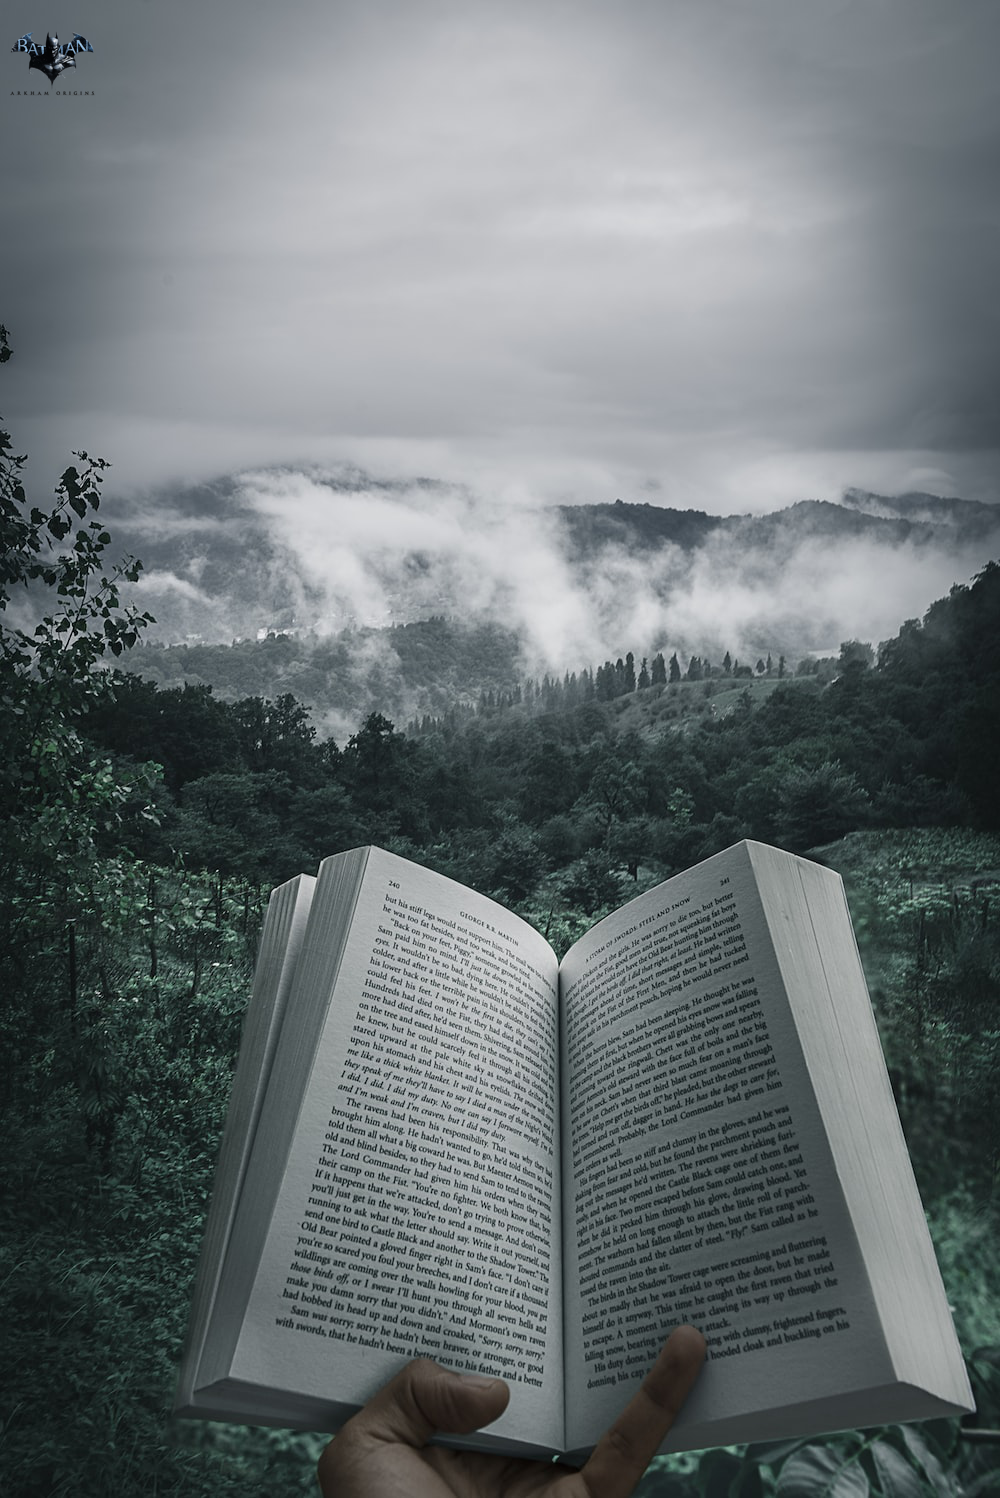

In [18]:
wallpaper = im4.copy()
wallpaper.paste(batman_logo, (10,20), mask=batman_logo)
wallpaper

In [21]:
im4.size

(1000, 1498)

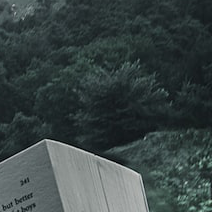

In [26]:
w, h = im4.width, im4.height
gradi_image = im4.crop((700,700, 912,912))  #...
gradi_image

In [29]:
im5.size

(512, 512)

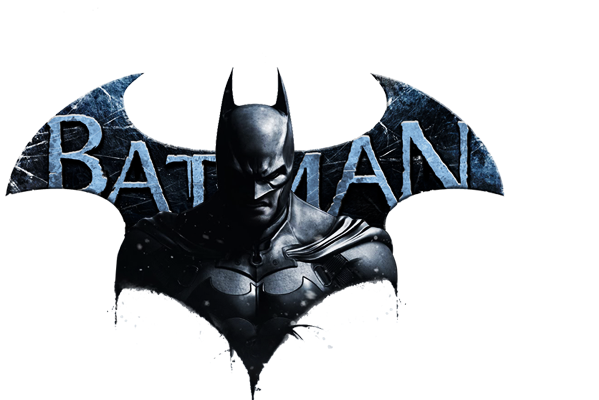

In [41]:
w, h = im5.width, im5.height
clean_logo = im5.crop((0,0, 599, 400))
clean_logo.save('batsign.png')
clean_logo


blending

In [42]:
a= gradi_image.resize((im2.width, im2.height))
b = im1.copy()
a = a.convert('RGB')
b = b.convert('RGB')

In [43]:
c= im2.resize((im1.width, im1.height))
c = c.convert('RGB')

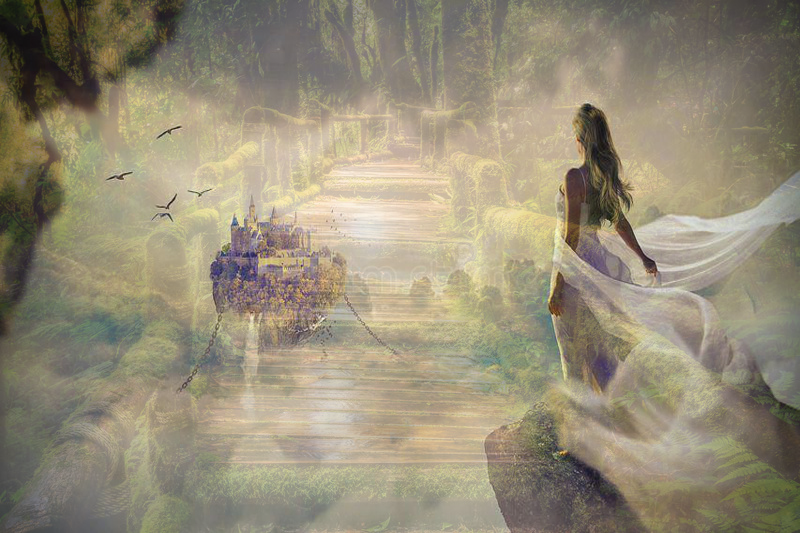

In [44]:
Image.blend(b,c, .8)

filters

In [45]:
filters= [
    ImageFilter.BLUR,
    ImageFilter.CONTOUR,
    ImageFilter.DETAIL,
    ImageFilter.EDGE_ENHANCE,
    ImageFilter.EDGE_ENHANCE_MORE,
    ImageFilter.EMBOSS,
    ImageFilter.FIND_EDGES,
    ImageFilter.SMOOTH,
    ImageFilter.SMOOTH_MORE,
    ImageFilter.SHARPEN
]

for i,f in enumerate(filters):
    im2.filter(f).save(f'generated/filter_{i}.png')

In [47]:
im2.filter(ImageFilter.MaxFilter(3)).show()
im2.filter(ImageFilter.MinFilter(3)).show()
im2.filter(ImageFilter.ModeFilter(3)).show()
im2.filter(ImageFilter.MedianFilter(3)).show()
im2.filter(ImageFilter.GaussianBlur(3)).show()


enhancing image

In [48]:
enIm1 = ImageEnhance.Color(im1)
enIm1.enhance(i).save(f'generated/colorboost_{i}.png')

In [52]:
for i in range(-10,11):
    enIm1.enhance(i).save(f'generated/colorboost_{i}.png')

drawing on image

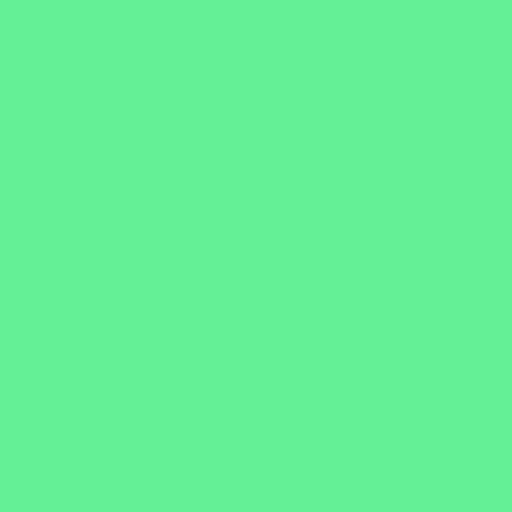

In [53]:
# a green image of 512x512
im6 = Image.new('RGB',(512, 512), (100, 240, 150))
im6

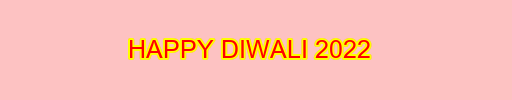

In [54]:
im7 = Image.new('RGBA', (512, 100), (250,100,100,100))
msg = "HAPPY DIWALI 2022"
font = "arial.ttf"
fontsize = 25
fontcolor = 'red'
font = font=ImageFont.truetype(font, fontsize)
pos = (512//4, 35)
draw_im7 = ImageDraw.Draw(im7)
draw_im7.text(pos, msg, fontcolor, font, align='center', stroke_width=2, stroke_fill='yellow')
im7


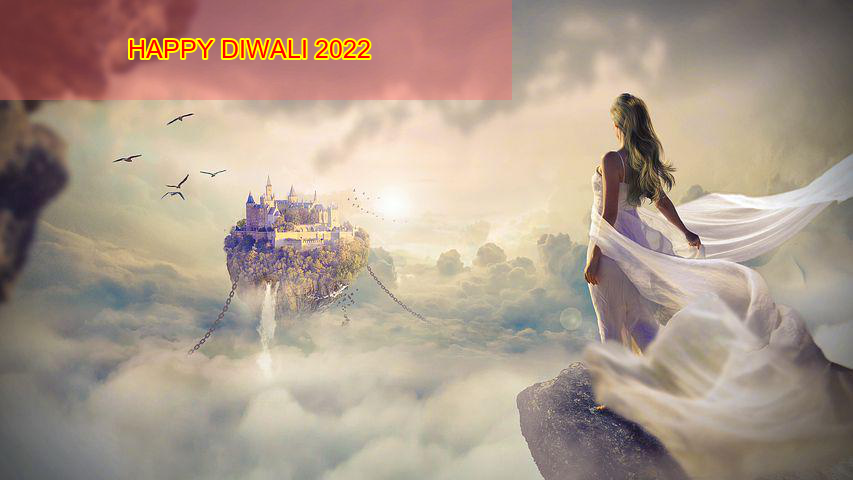

In [55]:
im2.paste(im7, (0,0), mask=im7)
im2